In [44]:
import numpy as np
import pygimli as pg
from pygimli.physics import ert
import pygimli.meshtools as mt
import seaborn as sns
import pandas as pd

In [2]:
data = ert.load('Surveys/full_data/nov_25_1.dat')

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x7fe8b1057970>)

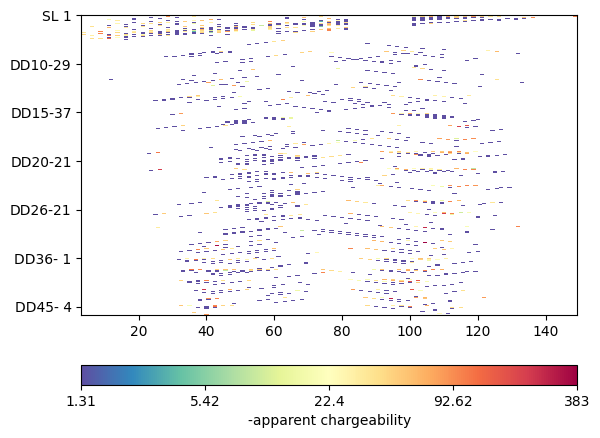

In [42]:
data.show("ip", label="-apparent chargeability")

In [3]:
data["k"] = ert.geometricFactors(data)

In [4]:
data["rhoa"] = data("r") * data("k") 

In [5]:
data.estimateError()

<Axes: ylabel='Count'>

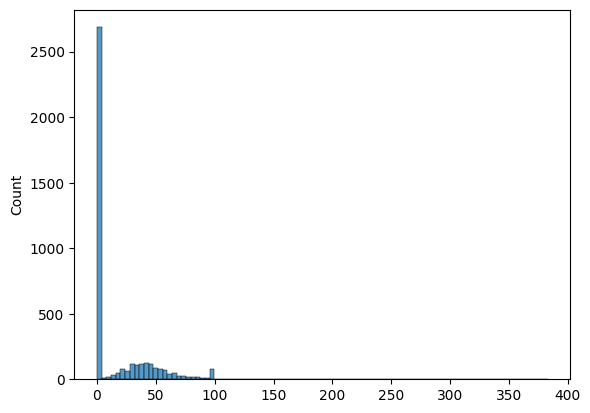

In [20]:
sns.histplot(data["ip"])

In [83]:
data.remove(data["ip"] > 100)

In [8]:
data_array_ip = np.array(data["ip"])

In [9]:
data_series_ip = pd.Series(data_array_ip)

In [10]:
quantile_659_ip = data_series_ip.quantile(0.659)
quantile_659_ip

1.3098800000000028

In [11]:
data["ip"] = [quantile_659_ip if ip < quantile_659_ip else ip for ip in data["ip"]] 

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x7fe8be675960>)

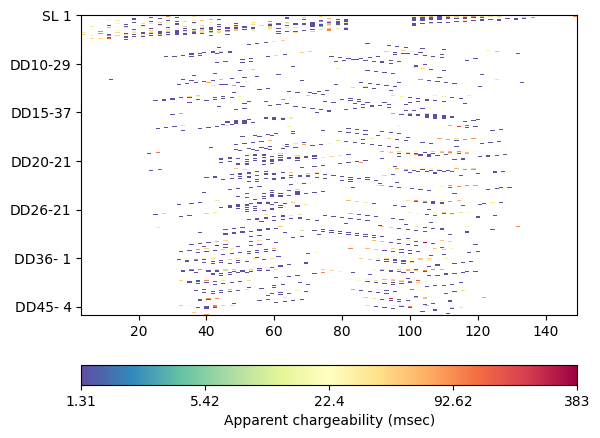

In [12]:
data.show("ip", label="Apparent chargeability (msec)")

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x7fe8a012bd30>)

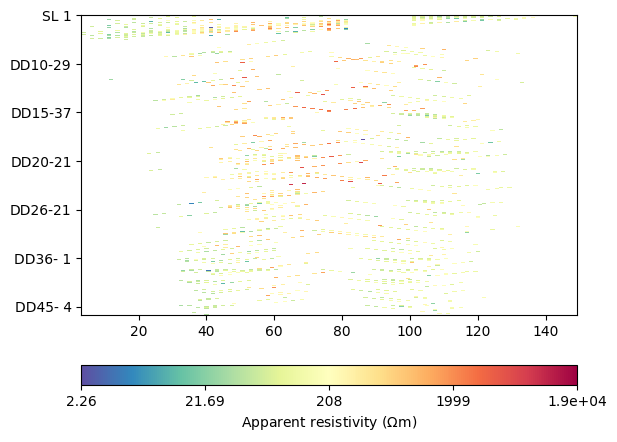

In [41]:
ert.show(data)

In [45]:
data_array_rhoa = np.array(data["rhoa"])
data_series_rhoa = pd.Series(data_array_rhoa)
quantile_99_rhoa = data_series_rhoa.quantile(0.99)

In [47]:
quantile_99_rhoa

2673.654997649679

<Axes: ylabel='Count'>

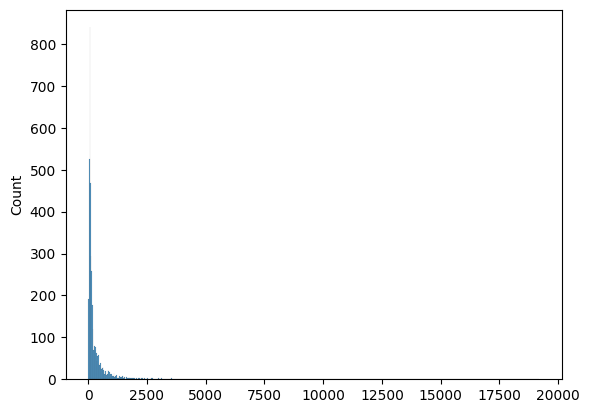

In [46]:
sns.histplot(data["rhoa"])

In [48]:
data.remove(data["rhoa"] > quantile_99_rhoa)

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x7fe8a023a380>)

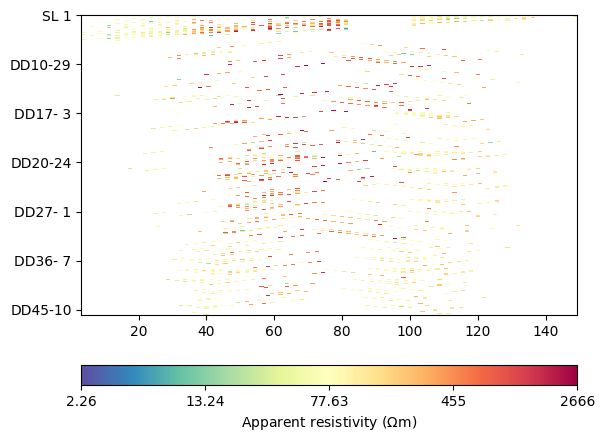

In [50]:
ert.show(data)

<Axes: ylabel='Count'>

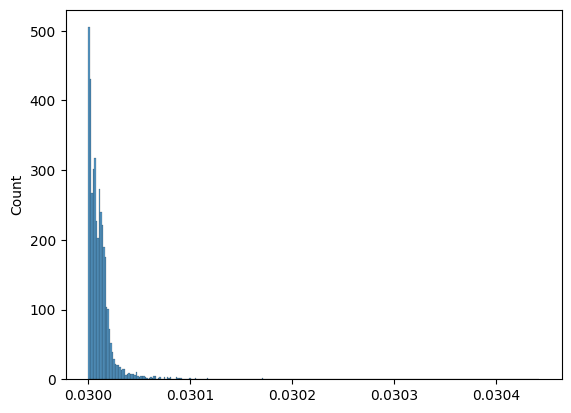

In [69]:
sns.histplot(data["err"])

In [51]:
mgr2 = ert.ERTIPManager(data)

In [52]:
inv2 = mgr2.invert(secNodes=1, paraMaxCellSize=10.0, 
                                     zWeight=0.2, verbose=1)

16/02/24 - 00:44:02 - pyGIMLi - INFO - Found 2 regions.
16/02/24 - 00:44:02 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
16/02/24 - 00:44:02 - pyGIMLi - INFO - Found 2 regions.
16/02/24 - 00:44:02 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
16/02/24 - 00:44:02 - pyGIMLi - INFO - Creating forward mesh from region infos.
16/02/24 - 00:44:02 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


Constructing Delaunay triangulation by divide-and-conquer method.
Delaunay milliseconds:  0
Recovering segments in Delaunay triangulation.
Segment milliseconds:  0
Removing unwanted triangles.
Spreading regional attributes and area constraints.
Hole milliseconds:  0
Adding Steiner points to enforce quality.
Quality milliseconds:  5

Writing vertices.
Writing triangles.
Writing segments.
Writing edges.

Output milliseconds:  0
Total running milliseconds:  5

Statistics:

  Input vertices: 135
  Input segments: 136
  Input holes: 0

  Mesh vertices: 1795
  Mesh triangles: 3413
  Mesh edges: 5207
  Mesh exterior boundary edges: 175
  Mesh interior boundary edges: 76
  Mesh subsegments (constrained edges): 251



16/02/24 - 00:44:03 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 7002 Cells: 13652 Boundaries: 10414
16/02/24 - 00:44:03 - pyGIMLi - INFO - Use median(data values)=112.49547282137395
16/02/24 - 00:44:03 - pyGIMLi - INFO - Created startmodel from forward operator: 2653 [112.49547282137395,...,112.49547282137395]
16/02/24 - 00:44:03 - pyGIMLi - INFO - Starting inversion.


min/max(dweight) = 32.8488/33.3329
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x7fe8a06f25c0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x7fe8a06f00e0>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x7fe8b248d7e0>
min/max (data): 2.26/2666
min/max (error): 3%/3.04%
min/max (start model): 112/112
--------------------------------------------------------------------------------
use model trans from RegionManager
Calculating response for model: min = 112.495 max = 112.495
Allocating memory for primary potential...... 0.148961

No primary potential for secondary field calculation with topography.
Creating P2-Primmesh:		Nodes: 27655	Cells: 13652	Boundaries: 20653
ModellingBase::setMesh() copying new mesh ... Found topography for surface=1463.38 : 1463.24
Found datafile: 64 electrodes
Found: 64 node-electrodes
rMin = 1.25854, rMax = 320.05
NGauLeg + NGauLag for inverse Fouriertransformation: 14 + 4
Found non-Neumann domain

16/02/24 - 00:52:54 - pyGIMLi - INFO - Found 1 regions.
16/02/24 - 00:52:54 - Core - INFO - Create H2 refined mesh for forward tasks.


-1.68237e+06 max = 9.30016e+06 mean = -980.668
Reciprocity rms(modelReciprocity) 398.043%, max: 8192.33%
tau = 0. Trying parabolic line search with step length 0.3Calculating response for model: min = 0.494788 max = 428517
Using existing primary potentials.
Forward: time: 6.11318s
Response: min = 4.65925 max = 887.699 mean = 143.478
Reciprocity rms(modelReciprocity) 11.6085%, max: 108.251%
 ==> tau = 0.12768
11: LS newModel: min = 0.00126053; max = 1.10241e+11
11: LS newResponse: min = 0.140981; max = 33638.4
11: rms/rrms(data, LS newResponse) = 1058.38/12557.5%
11: chi^2(data, LS newResponse, error, log) = 7235.13
11: Phi = 2.91286e+07+1672.21*20=2.91621e+07
Linesearch tau = 0.12768
Calculating response for model: min = 0.725172 max = 244649
Using existing primary potentials.
Forward: time: 5.46559s
Response: min = 7.38315 max = 678.916 mean = 156.481
Reciprocity rms(modelReciprocity) 9.98075%, max: 79.6891%
chi² = 640.73 (dPhi = 0.32%) lam: 20.0
######################################

16/02/24 - 00:52:54 - pyGIMLi - INFO - Starting inversion.


min/max(dweight) = 80.0641/962.189
fop: <pygimli.physics.ert.ipModelling.DCIPMModelling object at 0x7fe8b2029670>
Data transformation: <pgcore._pygimli_.RTrans object at 0x7fe8b248da80>
Model transformation: <pgcore._pygimli_.RTransLogLU object at 0x7fe8a0a1f880>
min/max (data): 0.0013/0.38
min/max (error): 3.26%/79.34%
min/max (start model): 0.0013/0.0013
--------------------------------------------------------------------------------
Calculating response for model: min = 0.724222 max = 244329
Using existing primary potentials.
Forward: time: 5.42782s
Response: min = 7.37348 max = 678.026 mean = 156.276
Reciprocity rms(modelReciprocity) 9.98075%, max: 79.6891%
min/max(dweight) = 80.0641/962.189
Building constraints matrix
constraint matrix of size(nBounds x nModel) 3876 x 2653
--------------------------------------------------------------------------------
inv.iter 1 ... calculating jacobian matrix (forced=1)...... 1.69e-05 s
min data = 0.00130988 max data = 0.383 (4026)
min error = 0

(1445.0, 1490.006104)

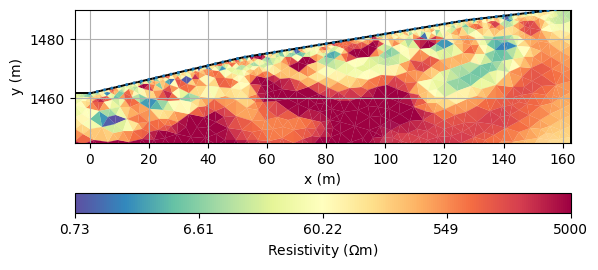

In [74]:
kw = dict(logScale=True, cMap="Spectral_r", xlabel="x (m)", ylabel="y (m)", cMin=0, cMax=5000)
ax, cb = mgr2.showResult(**kw)
ax.grid(True)
ax.set_ylim([1445, ax.get_ylim()[1]])

(1445.0, 1490.006104)

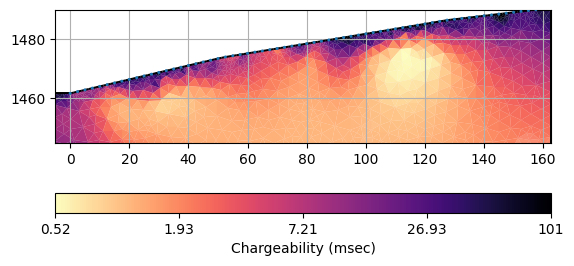

In [64]:
ax, cb = mgr2.showIPModel(label="Chargeability (msec)")
ax.grid(True)
ax.set_ylim([1445, ax.get_ylim()[1]])